# Data Import


In [13]:
# Importing necessary functions

import os
import random
import Augmentor
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


import matplotlib.pyplot as plt
from keras.preprocessing import image
import cv2
import tensorflow as tf

In [14]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    Concatenate,
    Dense,
    Lambda,
    BatchNormalization,
    GlobalAveragePooling2D,
    Activation,
    Conv2DTranspose,
)

from tensorflow.keras.models import Model
from wavetf._wavetf import WaveTFFactory

# Loading Images


In [4]:
normal_data_folder = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Normal Xrays copy'
implant_data_folder = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Implant Xrays'

# Get a list of all files in the data folder
normal_files = os.listdir(normal_data_folder)
implant_files = os.listdir(implant_data_folder)

normal_files = [file for file in normal_files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
implant_files = [file for file in implant_files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

normal_image_list = []
for image_file in normal_files:
    image_path = os.path.join(normal_data_folder, image_file)
    img = Image.open(image_path)
    normal_image_list.append(img)

implant_image_list = []
for image_file in implant_files:
    image_path = os.path.join(implant_data_folder, image_file)
    img = Image.open(image_path)
    implant_image_list.append(img)

    


AttributeError: type object 'Image' has no attribute 'open'

# Data Augmentation



In [3]:
p_normal = Augmentor.Pipeline('/Users/aditya/Desktop/My Computer/DDP/New/Data/Normal Xrays copy')
p_normal.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p_normal.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)

p_normal.sample(400)

Initialised with 50 image(s) found.
Output directory set to /Users/aditya/Desktop/My Computer/DDP/New/Data/Normal Xrays copy/output.

Processing <PIL.Image.Image image mode=L size=1208x1502 at 0x282B37DD0>: 100%|██████████| 400/400 [00:10<00:00, 37.83 Samples/s]                


In [4]:
p_implant = Augmentor.Pipeline('/Users/aditya/Desktop/My Computer/DDP/New/Data/Implant Xrays')
p_implant.rotate(probability=0.7, max_left_rotation=20, max_right_rotation=20)
p_implant.zoom(probability=0.5, min_factor=0.8, max_factor=1.6)

p_implant.sample(400)

Initialised with 25 image(s) found.
Output directory set to /Users/aditya/Desktop/My Computer/DDP/New/Data/Implant Xrays/output.

Processing <PIL.Image.Image image mode=L size=1220x1429 at 0x282C7F650>: 100%|██████████| 400/400 [00:24<00:00, 16.18 Samples/s]                


# Model


In [16]:
implant_xrays_dir = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented/Implant Xrays'
normal_xrays_dir = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented/Normal Xrays'

# Define image dimensions and other parameters
img_width, img_height = 150, 150  
batch_size = 32
epochs = 50

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 128)      

In [48]:
# Define input shape
img_width, img_height = 18, 18

# Create the Sequential model
model = Sequential()

# Add convolutional layers with max pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))

# Flatten the output to feed into dense layers
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 3, 3, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 1, 1, 128)         73856     
                                                                 
 flatten_4 (Flatten)         (None, 128)              

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Adjust the validation split as needed
)

train_generator = train_datagen.flow_from_directory(
    '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use 'validation' for validation generator
)

validation_generator = train_datagen.flow_from_directory(
    '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 640 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint_path = "best_model.h5"
checkpoint = ModelCheckpoint(checkpoint_path, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=50,
    callbacks=[checkpoint]
)

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 0.5187 - accuracy: 0.7203
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_model.h5
20/20 [==============================] - 14s 708ms/step - loss: 0.5187 - accuracy: 0.7203 - val_loss: 2.0012 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 0.1771 - accuracy: 0.9484
Epoch 2: val_accuracy improved from 0.50000 to 0.56875, saving model to best_model.h5
20/20 [==============================] - 14s 684ms/step - loss: 0.1771 - accuracy: 0.9484 - val_loss: 1.5530 - val_accuracy: 0.5688
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 0.1230 - accuracy: 0.9703
Epoch 3: val_accuracy improved from 0.56875 to 0.58125, saving model to best_model.h5
20/20 [==============================] - 13s 665ms/step - loss: 0.1230 - accuracy: 0.9703 - val_loss: 1.7113 - val_accuracy: 0.5813
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss:

In [21]:
train_loss = (history.history['loss'])
val_loss = (history.history['val_loss'])
train_acc = (history.history['accuracy'])
val_acc = (history.history['val_accuracy'])

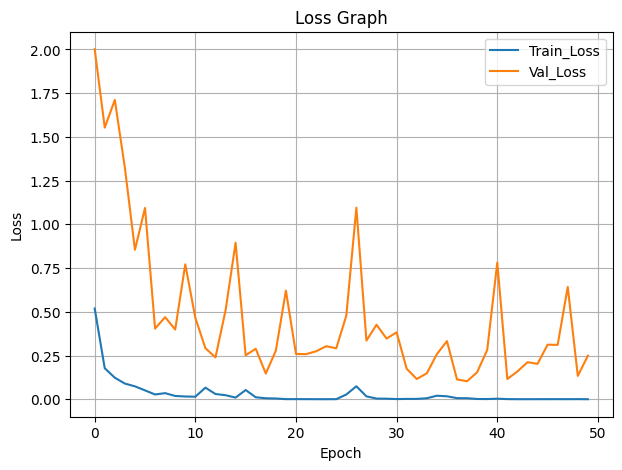

In [22]:
plt.figure(figsize=(7,5))
plt.title("Loss Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.plot(train_loss)
plt.plot(val_loss)

plt.legend(['Train_Loss','Val_Loss'])

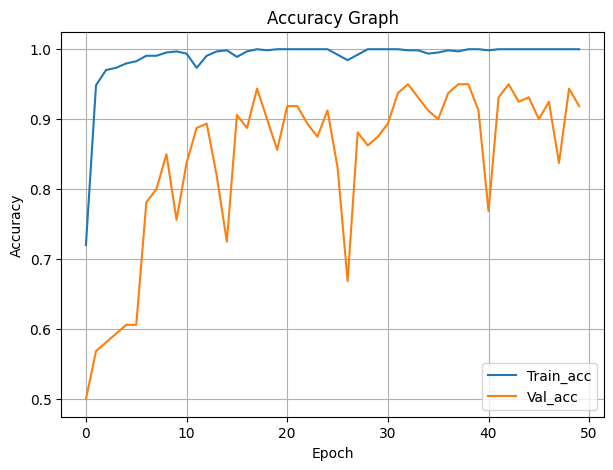

In [23]:
plt.figure(figsize=(7,5))
plt.title("Accuracy Graph")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['Train_acc','Val_acc'])

In [17]:
best_model = load_model(checkpoint_path)

In [24]:
model.save('xray_classifier_model_18may_.keras')

# Testing the Model

In [34]:
model = load_model('/Users/aditya/Desktop/My Computer/DDP/New/Files/xray_classifier_model_18may_.keras')  # Use the actual path to your saved model
img_arr = []

for i in range(5):
    image_path = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Implant Xrays/' + str(i) +'.png'  
    img = image.load_img(image_path, target_size=(150, 150))  
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize the pixel values
    img_arr.append(img)

for i in range(5):
    image_path = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Normal Xrays/' + str(i) +'.png'  
    img = image.load_img(image_path, target_size=(150, 150))  
    img = image.load_img(image_path, target_size=(150, 150))  
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize the pixel values
    img_arr.append(img)


img_arr = random.sample(img_arr, len(img_arr))
img_arr = np.array(img_arr)

1/1 [==============================] - 0s 14ms/step


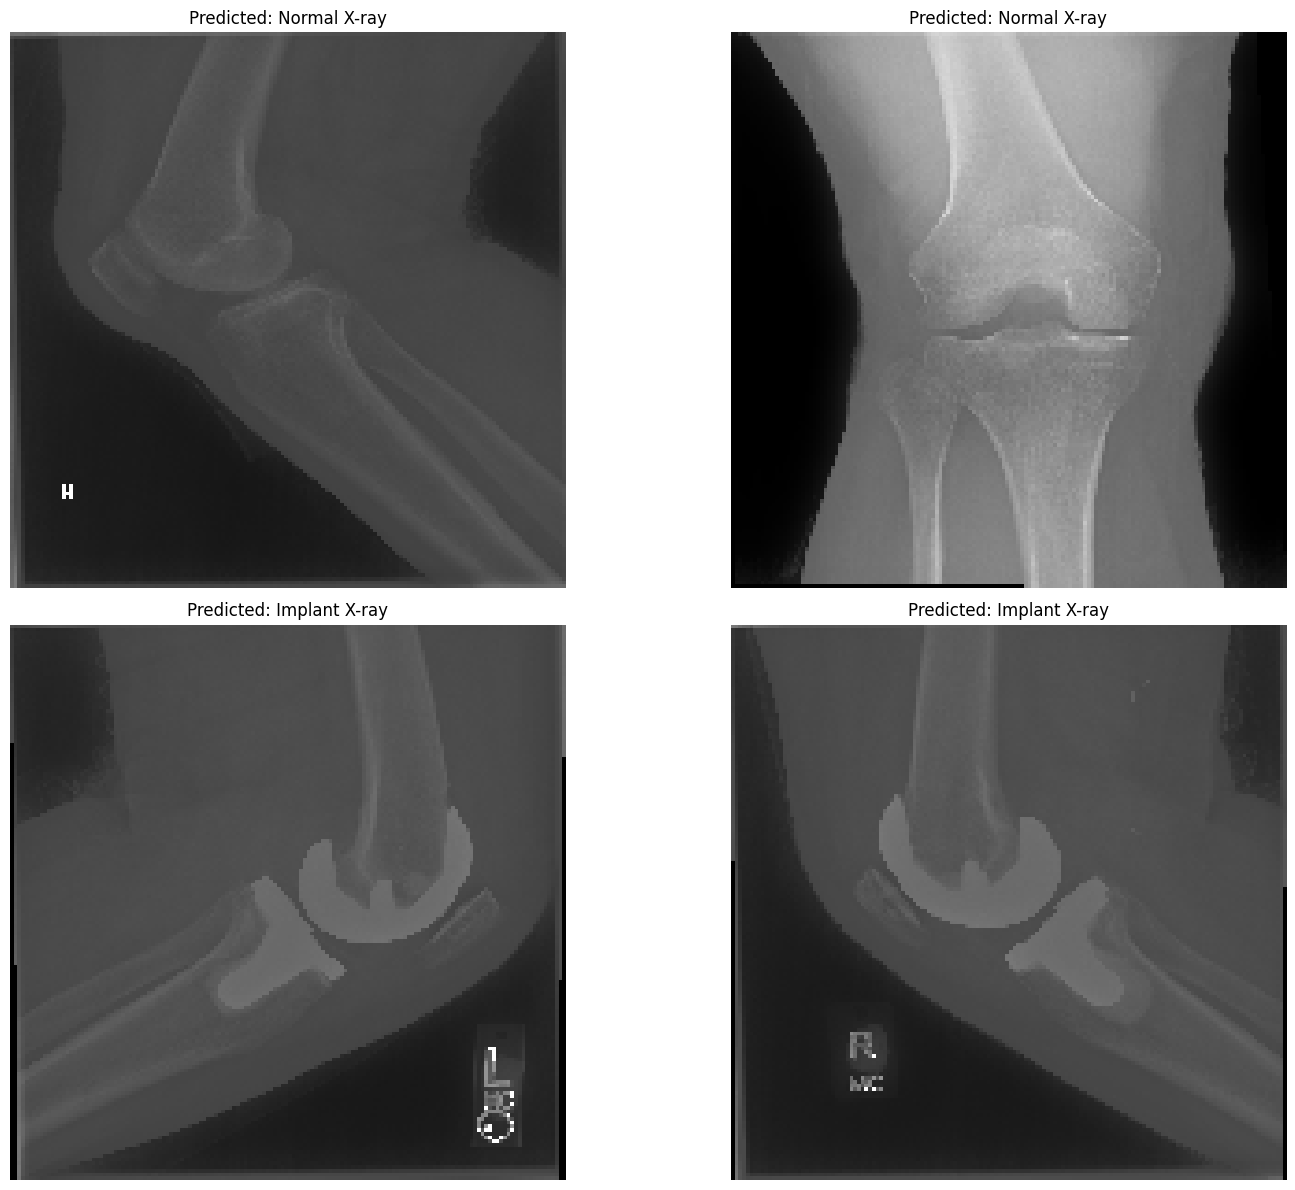

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Assuming img_arr is a list of 10 images and model is your trained model

# Calculate the number of rows and columns for the grid
num_images = len(img_arr)
num_cols = 2  # Number of columns in the grid
num_rows = 2  # Round up division

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

for i, img in enumerate(img_arr):
    
    row_index = i // num_cols
    col_index = i % num_cols
    
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    ax.imshow(img[0])
    ax.axis('off')
    
    prediction = model.predict(img)

    if prediction[0][0] >= 0.5:
        ax.set_title("Predicted: Normal X-ray")
    else:
        ax.set_title("Predicted: Implant X-ray")
    if i == 3: break

# Hide empty subplots
for i in range(num_images, num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show() 


# Heat Map



In [39]:
model_builder = keras.applications.xception.Xception
img_size = (150, 150)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "conv2d_11"


In [40]:
def make_gradcam_heatmap(image, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(image)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

1/1 [==============================] - 0s 33ms/step
(34, 34)


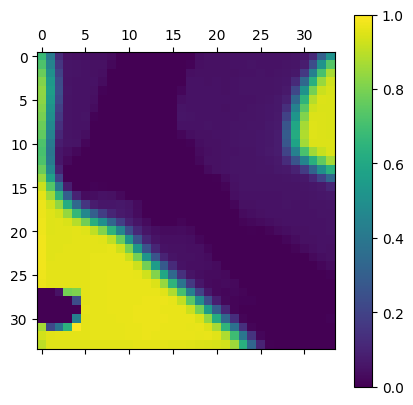

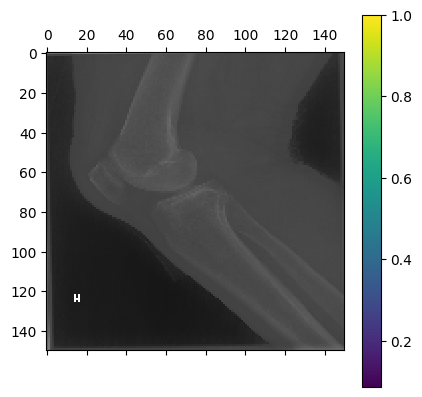

In [44]:
# Prepare image
# Make model
# 
# Remove last layer's softmax
# model.layers[-1].activation = None

# Print what the top predicted class is

num_images = 2
num_cols = 2 # Number of columns in the grid
num_rows = 1
curr_img = img_arr[7]

preds = model.predict(curr_img)
# print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(curr_img, model, last_conv_layer_name)

# Display heatmap
print(heatmap.shape)
plt.matshow(heatmap)
plt.colorbar()  # Add intensity bar
plt.show()

plt.matshow(curr_img[0])
plt.colorbar()  # Add intensity bar
plt.show()

(34, 34)
(150, 150, 3)


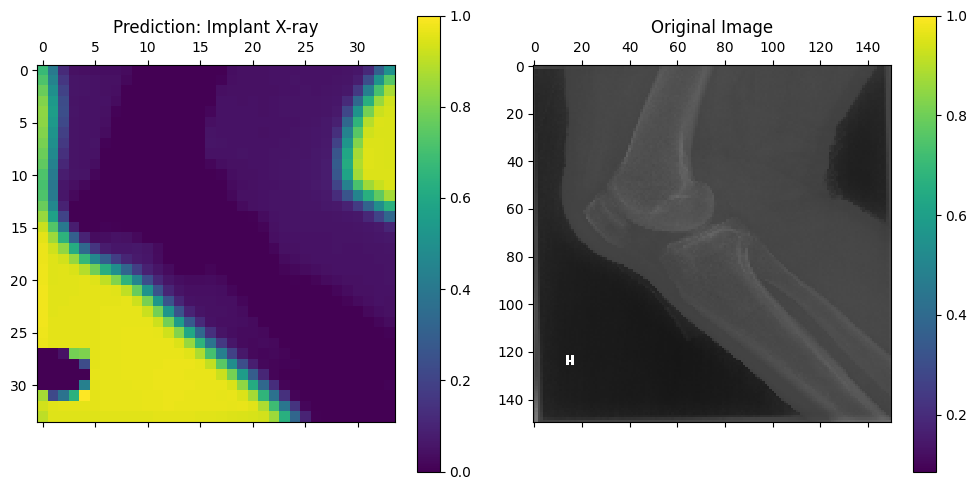

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
print(heatmap.shape)
print(curr_img[0].shape)
# Plot heatmap1
axs[0].matshow(heatmap)
axs[0].set_title('Prediction: Implant X-ray')
axs[0].grid(False)
fig.colorbar(axs[0].matshow(heatmap), ax=axs[0])

# Plot heatmap2
axs[1].matshow(curr_img[0])
axs[1].set_title('Original Image')
axs[1].grid(False)
fig.colorbar(axs[1].matshow(curr_img[0]), ax=axs[1])

plt.tight_layout()
plt.show()